In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv("tested.csv")

In [100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [101]:
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


In [102]:
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'], errors='ignore')
y = df['Survived']

In [103]:
# Encode categorical features
label_encoders = {}
categorical_cols = X.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str)  # Ensure all are strings (avoids NaN in string format)
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [104]:
# Handle missing values (numerical and categorical)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [105]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [106]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [107]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
# Predict
y_pred = model.predict(X_test)

In [109]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [110]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [111]:

print("\nEvaluation Results:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")


Evaluation Results:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000


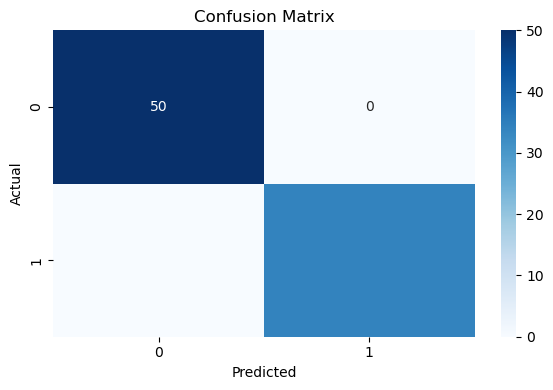

In [112]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [113]:
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/titanic_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(imputer, "models/imputer.pkl")

print("\n✅ Model, scaler, and imputer saved in the 'models' folder.")


✅ Model, scaler, and imputer saved in the 'models' folder.
